In [74]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# 1. Import data, QC

In [82]:
data=pd.read_csv('C:/Users/gellima/Desktop/Springboard_DScience/Data_Sci_Inhouse/data_EDA.csv')
data.head()


,Site,Request_id,Year,Quarter,GE_ID,BreedingZone,EvaluationZone,HetGrp,Type,Actual_embryos,Actual_haploid_embryos,Hap_rate,Actual_Elle_pots,Actual_D0_plants,Trans_rate,Actual_D0_poll,Poll_rate
0,AZ,178950,2015,1,67133087,TE,NAWN,SSS,S,9425,1308,14,599.0,537.0,90.0,256.0,48.0
1,AZ,178955,2015,1,67133419,TE,NAWN,SSS,S,8029,1206,15,699.0,606.0,87.0,299.0,49.0
2,AZ,178969,2015,1,67226512,TE,NAWN,NSS,O,3373,976,29,466.0,270.0,58.0,196.0,73.0
3,AZ,178971,2015,1,67226501,TE,NAWN,NSS,O,4227,1189,28,518.0,310.0,60.0,184.0,59.0
4,AZ,178973,2015,1,67226717,TE,NAWN,NSS,O,5360,1277,24,623.0,516.0,83.0,286.0,55.0


In [84]:
data.shape

(14811, 17)

In [85]:
# change year and quarter column type to object
data['Year']=data['Year'].astype(object)
data['Quarter']=data['Quarter'].astype(object)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14811 entries, 0 to 14810
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Site                    14811 non-null  object 
 1   Request_id              14811 non-null  int64  
 2   Year                    14811 non-null  object 
 3   Quarter                 14811 non-null  object 
 4   GE_ID                   14811 non-null  int64  
 5   BreedingZone            14811 non-null  object 
 6   EvaluationZone          14811 non-null  object 
 7   HetGrp                  14811 non-null  object 
 8   Type                    14811 non-null  object 
 9   Actual_embryos          14811 non-null  int64  
 10  Actual_haploid_embryos  14811 non-null  int64  
 11  Hap_rate                14811 non-null  int64  
 12  Actual_Elle_pots        14811 non-null  float64
 13  Actual_D0_plants        14811 non-null  float64
 14  Trans_rate              14811 non-null

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14811 entries, 0 to 14810
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Site                    14811 non-null  object 
 1   Request_id              14811 non-null  int64  
 2   Year                    14811 non-null  object 
 3   Quarter                 14811 non-null  object 
 4   GE_ID                   14811 non-null  int64  
 5   BreedingZone            14811 non-null  object 
 6   EvaluationZone          14811 non-null  object 
 7   HetGrp                  14811 non-null  object 
 8   Type                    14811 non-null  object 
 9   Actual_embryos          14811 non-null  int64  
 10  Actual_haploid_embryos  14811 non-null  int64  
 11  Hap_rate                14811 non-null  int64  
 12  Actual_Elle_pots        14811 non-null  float64
 13  Actual_D0_plants        14811 non-null  float64
 14  Trans_rate              14811 non-null

In [87]:
cat_fea=data.select_dtypes('object')
cat_fea.head()

,Site,Year,Quarter,BreedingZone,EvaluationZone,HetGrp,Type
0,AZ,2015,1,TE,NAWN,SSS,S
1,AZ,2015,1,TE,NAWN,SSS,S
2,AZ,2015,1,TE,NAWN,NSS,O
3,AZ,2015,1,TE,NAWN,NSS,O
4,AZ,2015,1,TE,NAWN,NSS,O


# 4 Feature Engineering

Missinge values were imputed in wrangling session, so no nan values are there in this dataset


## 4.1 IS Log transformation required???????????????
Since most of the numeric variables of the dataset had skewed distribution, planning to do Log transformation
A critical note: The data you apply log transform must have only positive values, otherwise you receive an error.

## 4.1.1 Plotting Numeric features of the dataset

In [88]:
#Use 'select_dtypes` method to select columns of dtype 'object'
#num_fea=data.select_dtypes(exclude='object').copy()
#num_fea.head()

#num_fea.hist(layout=(3,4), figsize=(15,10))
#Give the subplots a little "breathing room" with a wspace of 0.5
#plt.subplots_adjust(wspace=1.0)      

# Tight layout often produces nice results
# but requires the title to be spaced accordingly
#plt.tight_layout()
#plt.suptitle('Distribution of numeric features', Fontsize=20)
#plt.subplots_adjust(top=0.92)
#plt.show()

# 4.2 Encoding

# 4.2.1 Encoding catogorical features with LabelEncoder
Encode the categorical features (change categorical data to numbers), fed to the machine learning models

In [89]:
df=data
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['Site'] = label.fit_transform(df['Site'].values)
df['BreedingZone'] = label.fit_transform(df['BreedingZone'].values)
df['EvaluationZone'] = label.fit_transform(df['EvaluationZone'].values)
df['HetGrp'] = label.fit_transform(df['HetGrp'].values)
df['Type'] = label.fit_transform(df['Type'].values)

print(df.head())

   Site  Request_id  Year Quarter     GE_ID  BreedingZone  EvaluationZone  \
0     0      178950  2015       1  67133087             0              11   
1     0      178955  2015       1  67133419             0              11   
2     0      178969  2015       1  67226512             0              11   
3     0      178971  2015       1  67226501             0              11   
4     0      178973  2015       1  67226717             0              11   

   HetGrp  Type  Actual_embryos  Actual_haploid_embryos  Hap_rate  \
0       1     3            9425                    1308        14   
1       1     3            8029                    1206        15   
2       0     2            3373                     976        29   
3       0     2            4227                    1189        28   
4       0     2            5360                    1277        24   

   Actual_Elle_pots  Actual_D0_plants  Trans_rate  Actual_D0_poll  Poll_rate  
0             599.0             537.0      

In [90]:
df.shape

(14811, 17)

## 4.2.2 One-hot Encoding; creates dummy columns
One hot encoding create ’n’ columns where n is the number of unique values that the nominal variable.



In [125]:
# create dummy columns for categorical features
dummy_data=pd.get_dummies(data=data, columns=['Site','Year','Quarter','BreedingZone','EvaluationZone','HetGrp','Type'])
dummy_data.head()


,Request_id,GE_ID,Actual_embryos,Actual_haploid_embryos,Hap_rate,Actual_Elle_pots,Actual_D0_plants,Trans_rate,Actual_D0_poll,Poll_rate,...,EvaluationZone_9,EvaluationZone_10,EvaluationZone_11,EvaluationZone_12,HetGrp_0,HetGrp_1,Type_0,Type_1,Type_2,Type_3
0,178950,67133087,9425,1308,14,599.0,537.0,90.0,256.0,48.0,...,0,0,1,0,0,1,0,0,0,1
1,178955,67133419,8029,1206,15,699.0,606.0,87.0,299.0,49.0,...,0,0,1,0,0,1,0,0,0,1
2,178969,67226512,3373,976,29,466.0,270.0,58.0,196.0,73.0,...,0,0,1,0,1,0,0,0,1,0
3,178971,67226501,4227,1189,28,518.0,310.0,60.0,184.0,59.0,...,0,0,1,0,1,0,0,0,1,0
4,178973,67226717,5360,1277,24,623.0,516.0,83.0,286.0,55.0,...,0,0,1,0,1,0,0,0,1,0


In [98]:
dummy_data.shape

(14811, 44)

# 4.3 Split the data into train and test subsamples

In [126]:
X=dummy_data.drop(['Hap_rate'], axis=1)
y=dummy_data[['Hap_rate']]

In [127]:
X.shape

(14811, 43)

In [128]:
y.shape

(14811, 1)

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [138]:
#X_test.head()
print('X_train size:', X_train.size)
print('X_test size:', X_test.size)
print('y_train size:', y_train.size)
print('y_test size:', y_test.size)


X_train size: 509464
X_test size: 127409
y_train size: 11848
y_test size: 2963


# 4.4 Scale the numeric data

scale() transforms numeric data columns with mean 0 and std 1.0

build scaler based on training data and apply it to test data to then also scale the test data

In [139]:
#scale the data
from sklearn import preprocessing
import numpy as np
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [113]:
## slicing numeric data (int, float) by excluding object datatype
num_fea=X.select_dtypes(exclude='object')
num_fea.head()

,Request_id,GE_ID,Actual_embryos,Actual_haploid_embryos,Actual_Elle_pots,Actual_D0_plants,Trans_rate,Actual_D0_poll,Poll_rate,Site_0,...,EvaluationZone_9,EvaluationZone_10,EvaluationZone_11,EvaluationZone_12,HetGrp_0,HetGrp_1,Type_0,Type_1,Type_2,Type_3
0,178950,67133087,9425,1308,599.0,537.0,90.0,256.0,48.0,1,...,0,0,1,0,0,1,0,0,0,1
1,178955,67133419,8029,1206,699.0,606.0,87.0,299.0,49.0,1,...,0,0,1,0,0,1,0,0,0,1
2,178969,67226512,3373,976,466.0,270.0,58.0,196.0,73.0,1,...,0,0,1,0,1,0,0,0,1,0
3,178971,67226501,4227,1189,518.0,310.0,60.0,184.0,59.0,1,...,0,0,1,0,1,0,0,0,1,0
4,178973,67226717,5360,1277,623.0,516.0,83.0,286.0,55.0,1,...,0,0,1,0,1,0,0,0,1,0


In [115]:
 #num_fea.info()

### Since GE_ID are unique values, setting as index


In [116]:
num_fea=num_fea.set_index('GE_ID')
num_fea.head()

,Request_id,Actual_embryos,Actual_haploid_embryos,Actual_Elle_pots,Actual_D0_plants,Trans_rate,Actual_D0_poll,Poll_rate,Site_0,Site_1,...,EvaluationZone_9,EvaluationZone_10,EvaluationZone_11,EvaluationZone_12,HetGrp_0,HetGrp_1,Type_0,Type_1,Type_2,Type_3
GE_ID,,,,,,,,,,,,,,,,,,,,,
67133087,178950,9425,1308,599.0,537.0,90.0,256.0,48.0,1,0,...,0,0,1,0,0,1,0,0,0,1
67133419,178955,8029,1206,699.0,606.0,87.0,299.0,49.0,1,0,...,0,0,1,0,0,1,0,0,0,1
67226512,178969,3373,976,466.0,270.0,58.0,196.0,73.0,1,0,...,0,0,1,0,1,0,0,0,1,0
67226501,178971,4227,1189,518.0,310.0,60.0,184.0,59.0,1,0,...,0,0,1,0,1,0,0,0,1,0
67226717,178973,5360,1277,623.0,516.0,83.0,286.0,55.0,1,0,...,0,0,1,0,1,0,0,0,1,0


In [117]:
# save index of numeric data
num_fea_index=num_fea.index
#num_fea_index

In [118]:
# save columns of numeric data
num_fea_cols=num_fea.columns
#num_cols

In [119]:
# scale() returns ndarray with no column names, since i want to visualize scaled data, copied column headers separately in earlier step 
num_scale=scale(num_fea)
#num_scale

In [124]:
# create scaled_num_fea dataframe for scaled ndarray using col names saved
scaled_num_df=pd.DataFrame(num_scale, columns=num_fea_cols, index=num_fea_index)
scaled_num_df.head()

,Request_id,Actual_embryos,Actual_haploid_embryos,Actual_Elle_pots,Actual_D0_plants,Trans_rate,Actual_D0_poll,Poll_rate,Site_0,Site_1,...,EvaluationZone_9,EvaluationZone_10,EvaluationZone_11,EvaluationZone_12,HetGrp_0,HetGrp_1,Type_0,Type_1,Type_2,Type_3
GE_ID,,,,,,,,,,,,,,,,,,,,,
67133087,0.155020,2.855074,0.653781,0.127053,0.310501,0.687259,0.136138,-0.375122,0.672988,-0.672988,...,-0.238636,-0.264583,3.07447,-0.346545,-0.965029,0.965029,-0.567916,-0.271242,-0.452259,0.965029
67133419,0.155082,2.100838,0.433808,0.437450,0.555305,0.485323,0.416693,-0.313756,0.672988,-0.672988,...,-0.238636,-0.264583,3.07447,-0.346545,-0.965029,0.965029,-0.567916,-0.271242,-0.452259,0.965029
67226512,0.155253,-0.414723,-0.062209,-0.285773,-0.636782,-1.466725,-0.255334,1.159039,0.672988,-0.672988,...,-0.238636,-0.264583,3.07447,-0.346545,1.036238,-1.036238,-0.567916,-0.271242,2.211123,-1.036238
67226501,0.155278,0.046679,0.397146,-0.124367,-0.494867,-1.332101,-0.333628,0.299909,0.672988,-0.672988,...,-0.238636,-0.264583,3.07447,-0.346545,1.036238,-1.036238,-0.567916,-0.271242,2.211123,-1.036238
67226717,0.155302,0.658821,0.586926,0.201549,0.235996,0.216075,0.331874,0.054443,0.672988,-0.672988,...,-0.238636,-0.264583,3.07447,-0.346545,1.036238,-1.036238,-0.567916,-0.271242,2.211123,-1.036238


### 3.1.1.1 Verifying the scaling/ validating scaling if data transformed to Mean 0 and Std 1

Is done by checking the mean of scaled features

In [121]:
scaled_num_df.mean()

Request_id               -4.036112e-16
Actual_embryos            4.945818e-17
Actual_haploid_embryos   -3.686951e-16
Actual_Elle_pots          1.498063e-15
Actual_D0_plants         -5.114957e-15
Trans_rate               -3.446762e-16
Actual_D0_poll           -1.452472e-15
Poll_rate                 4.526533e-16
Site_0                   -1.312701e-13
Site_1                    1.312701e-13
Year_2015                -5.541738e-15
Year_2016                 8.312648e-15
Year_2017                -1.824878e-15
Year_2018                -7.598660e-15
Year_2019                 4.643978e-14
Quarter_1                -4.964783e-15
Quarter_2                 1.395865e-14
Quarter_3                -5.917389e-15
Quarter_4                 9.474923e-15
BreedingZone_0            1.470215e-15
BreedingZone_1           -1.856166e-15
BreedingZone_2            1.523624e-16
BreedingZone_3            3.955305e-15
EvaluationZone_0         -9.327005e-16
EvaluationZone_1          1.481103e-15
EvaluationZone_2         

##### Mean of scaled numeric features is pretty much zero! How about standard deviation (should be closer to 1)

In [122]:
scaled_num_df.std()

Request_id                1.000034
Actual_embryos            1.000034
Actual_haploid_embryos    1.000034
Actual_Elle_pots          1.000034
Actual_D0_plants          1.000034
Trans_rate                1.000034
Actual_D0_poll            1.000034
Poll_rate                 1.000034
Site_0                    1.000034
Site_1                    1.000034
Year_2015                 1.000034
Year_2016                 1.000034
Year_2017                 1.000034
Year_2018                 1.000034
Year_2019                 1.000034
Quarter_1                 1.000034
Quarter_2                 1.000034
Quarter_3                 1.000034
Quarter_4                 1.000034
BreedingZone_0            1.000034
BreedingZone_1            1.000034
BreedingZone_2            1.000034
BreedingZone_3            1.000034
EvaluationZone_0          1.000034
EvaluationZone_1          1.000034
EvaluationZone_2          1.000034
EvaluationZone_3          1.000034
EvaluationZone_4          1.000034
EvaluationZone_5    

#### Hmm, std should be closer to 1, but is higher than 1. `scale()` uses the biased estimator for standard deviation (ddof=0). std() uses dd0f=1 by default, it's normalized by N-1

In [123]:
# redo std using ddof=0 as parameter of std
scaled_num_df.std(ddof=0)

Request_id                1.0
Actual_embryos            1.0
Actual_haploid_embryos    1.0
Actual_Elle_pots          1.0
Actual_D0_plants          1.0
Trans_rate                1.0
Actual_D0_poll            1.0
Poll_rate                 1.0
Site_0                    1.0
Site_1                    1.0
Year_2015                 1.0
Year_2016                 1.0
Year_2017                 1.0
Year_2018                 1.0
Year_2019                 1.0
Quarter_1                 1.0
Quarter_2                 1.0
Quarter_3                 1.0
Quarter_4                 1.0
BreedingZone_0            1.0
BreedingZone_1            1.0
BreedingZone_2            1.0
BreedingZone_3            1.0
EvaluationZone_0          1.0
EvaluationZone_1          1.0
EvaluationZone_2          1.0
EvaluationZone_3          1.0
EvaluationZone_4          1.0
EvaluationZone_5          1.0
EvaluationZone_6          1.0
EvaluationZone_7          1.0
EvaluationZone_8          1.0
EvaluationZone_9          1.0
Evaluation

# 3.1 Visualizing High Dimensional Data

Saummary statistics and distribution of features, didn't reveal any outliers. One other way to disentangle the relationship of features is via principle components analysis (PCA). The basic steps in this process are:
1. scale the data (when features are heterogenous) in such way col mean is 0 and std 1
2. fit the PCA transformation (learn the transformation from the data)
3. apply the transformation to the data to create the derived features
4. (optionally) use the derived features to look for patterns in the data and explore the coefficients


## 3.1.2 Calculate the PCA transformation

#### Fit PCA transformation using the scaled data

In [18]:
num_pca=PCA().fit(num_scale)

### Plot the cumulative variance ratio with number of components

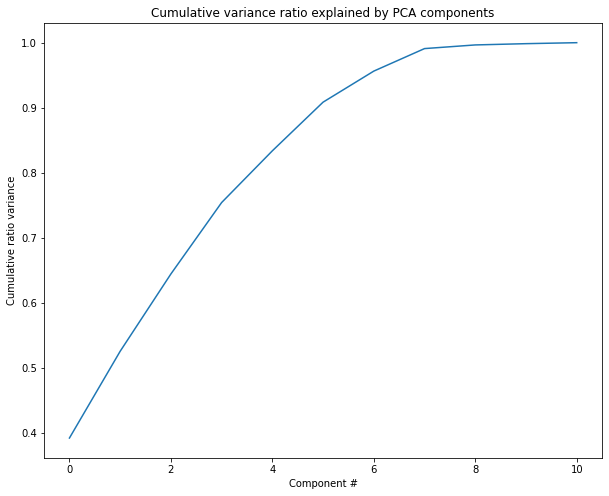

In [19]:
# Call the `cumsum()` method on the 'explained_variance_ratio_' attribute of num_pca
# create line plot cumulative explained variance ratio (y-axis) vs # of components (x-axis)
#Hint: remember the handy ';' at the end of the last plot call to suppress that untidy output

plt.subplots(figsize=(10,8))
plt.plot(num_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')

plt.title('Cumulative variance ratio explained by PCA components');

In [20]:
for index, var in enumerate (num_pca.explained_variance_ratio_.cumsum()):
    print(index, var)

0 0.3923286153534371
1 0.5257045560466196
2 0.6445152416420767
3 0.754277719755723
4 0.8338029094808646
5 0.9085873062249139
6 0.9563177331706703
7 0.9909321818277701
8 0.9965479304615488
9 0.998500613577183
10 1.0


###  Summary of PCA: The first two components seem to account for over 50% of the variance, and the first five for over 85%.

#### Apply the transformation to the scaled data (num_scale) to obtain the derived features


In [21]:
num_pca_x=num_pca.transform(num_scale)
#num_pca_x[:5]
#num_pca_x.shape

#### Plot percentage variance explained by the two PCA components (first & second columns of the transformed data/first two principle components) 

[ 1.97625998  1.92799319 -0.60999289 ... -3.28924383 -3.24369515
 -3.12346542] [-2.06839631 -1.82016002  1.4598434  ... -0.27212753  0.12752867
 -0.60342468]


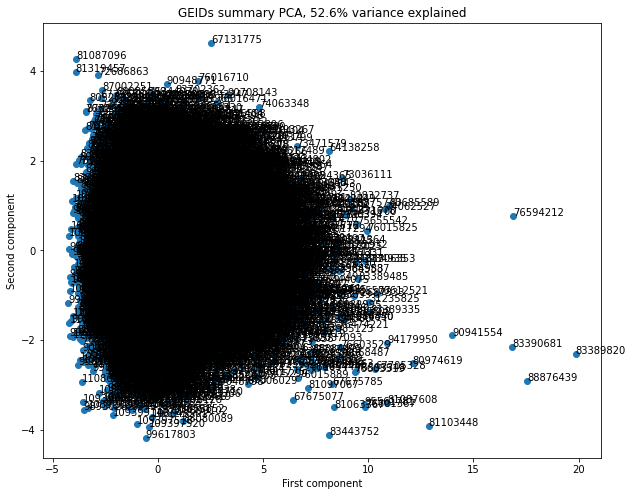

In [22]:
x = num_pca_x[:, 0]
y = num_pca_x[:, 1]
print(x, y)
GEID=num_fea_index
pc_var = 100 * num_pca.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(10,8))
plt.scatter(x=x, y=y)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f'GEIDs summary PCA, {pc_var:.1f}% variance explained')
for s, x, y in zip(GEID, x, y):
    plt.annotate(s, (x, y))

### 3.1 Conclusion On How To Handle GEIDs: treating all GEIDs equally while building prediction model 

# 3.2 Feature Engineering

# 3.2.1 Feature correlation heatmap
Gives high level view of relationships amongst the features

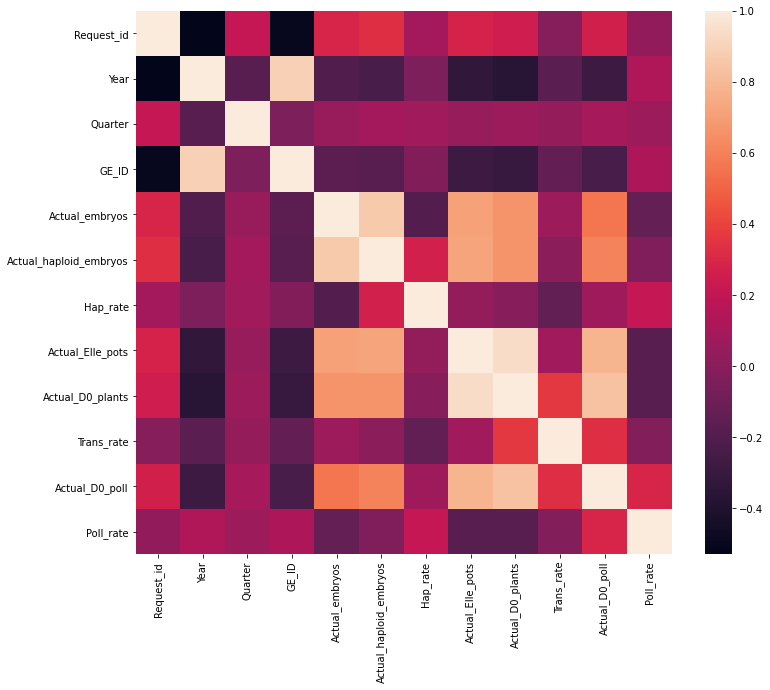

In [23]:
#Show a seaborn heatmap of correlations in data
#Hint: call pandas' `corr()` method on `data` and pass that into `sns.heatmap`
plt.subplots(figsize=(12,10))
sns.heatmap(data.corr());

##### None of the numeric features are correlated with target variable: Hap_rate

# 3.2.2 Scatterplots of numeric features against target variable: Hap_rate

Correlations, in heatmap is a great first pass at identifying patterns. But correlation can mask relationships between two variables. A series of scatterplots help to really dive into how Hap_rate varies with other numeric features.

In [24]:
# define useful function to create scatterplots of Hap_rate against desired columns
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.8)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'Hap_rate', data=data, alpha=0.5)
        ax.set(xlabel=col, ylabel='Hap_rate')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [25]:
#Use a list comprehension to build a list of features from the columns of `data` that
#are _not_ any of categorical columns, or 'Hap_rate'
features = [col for col in data.columns if col not in ['Site', 'BreedingZone','EvaluationZone','HetGrp','Type','Hap_rate']]
len(features)

11

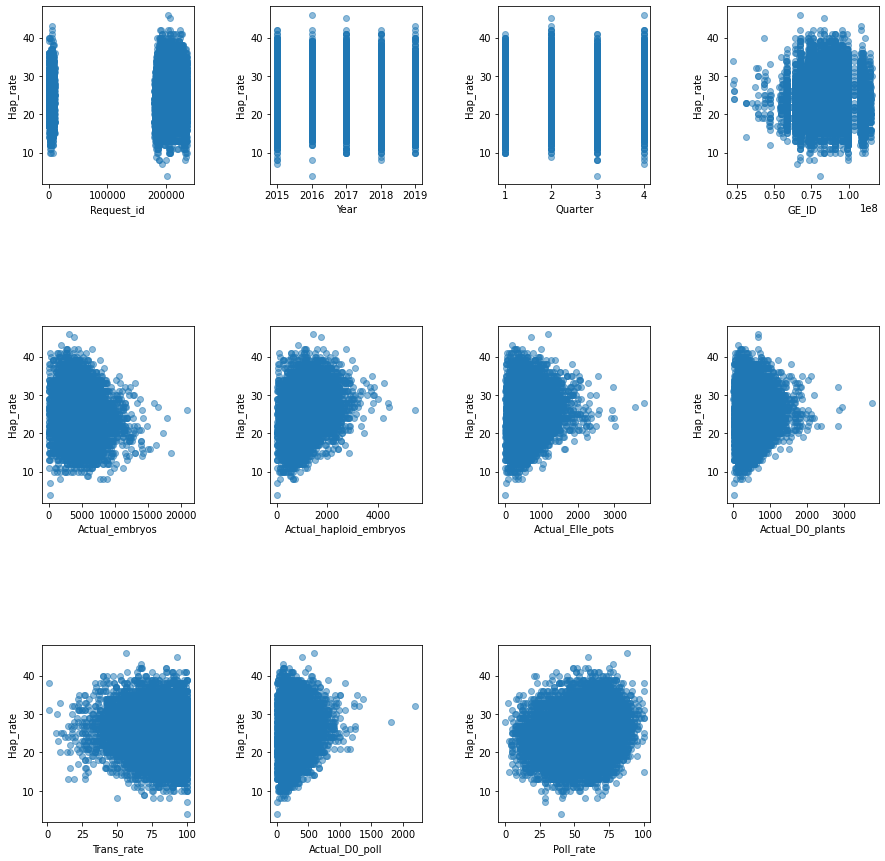

In [26]:
scatterplots(features, ncol=4, figsize=(15, 15))

# conclusion: No strong correlation is observed between Hap_rate and other numeric features

# 3.3 Feature Selection

In [28]:
# import libraries
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

# devide predictors and target, to keep things simple, we'll use only numerical predictors
data_num = data.drop(['Hap_rate'], axis=1)
X = data_num.select_dtypes(exclude=['object'])
y = data.Hap_rate

# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
# fit RFE
rfe.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
    print('Column: %s, Selected=%s, Rank: %d' % (X.columns[i], rfe.support_[i], rfe.ranking_[i]))


Column: Request_id, Selected=True, Rank: 1
Column: Year, Selected=False, Rank: 7
Column: Quarter, Selected=False, Rank: 6
Column: GE_ID, Selected=False, Rank: 2
Column: Actual_embryos, Selected=True, Rank: 1
Column: Actual_haploid_embryos, Selected=True, Rank: 1
Column: Actual_Elle_pots, Selected=True, Rank: 1
Column: Actual_D0_plants, Selected=False, Rank: 5
Column: Trans_rate, Selected=False, Rank: 4
Column: Actual_D0_poll, Selected=False, Rank: 3
Column: Poll_rate, Selected=True, Rank: 1
